In [10]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [11]:
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
train['qualityindex'] = (train.overallqual*train.overallcond)
train['totalsqftcalc'] = (train.bsmtfinsf1+train.bsmtfinsf2+train.grlivarea)
train['pricesqfoot'] = (train['saleprice']/train['totalsqftcalc'])
test['qualityindex'] = (test.overallqual*test.overallcond)
test['totalsqftcalc'] = (test.bsmtfinsf1+test.bsmtfinsf2+test.grlivarea)
test['pricesqfoot'] = (test['saleprice']/test['totalsqftcalc'])
train=train.replace({'totalsqftcalc': {np.NaN : 10000}})
train=train.replace({'lotarea': {np.NaN : 10000}})
train=train.replace({'lotfrontage': {np.NaN : 10000}})
test=test.replace({'totalsqftcalc': {np.NaN : 10000}})
test=test.replace({'lotarea': {np.NaN : 10000}})
test=test.replace({'lotfrontage': {np.NaN : 10000}})

In [12]:
test['Neighborhood_Group'] = np.nan
#added due to later work with Neighborhood groupings

In [13]:
train = train[train['totalsqftcalc'] < 6000]
train = train[train['salecondition'] == 'Normal']
train = train[train['saleprice'] <= 500000]
train = train[train['lotarea'] <= 25000]
train = train[train['zoning'] != 'I']
train = train[train['zoning'] != 'C']
train = train[train['zoning'] != 'A']

In [14]:
X = train[['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
X1 = train[['qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
corr = X[X.columns].corr()
corr

,saleprice,qualityindex,totalsqftcalc,yearbuilt,lotarea,lotfrontage
saleprice,1.000000,0.540376,0.792214,0.547300,0.395148,0.084242
qualityindex,0.540376,1.000000,0.346798,0.092073,0.119472,0.048181
totalsqftcalc,0.792214,0.346798,1.000000,0.358158,0.376621,0.125655
yearbuilt,0.547300,0.092073,0.358158,1.000000,0.056350,0.115568
lotarea,0.395148,0.119472,0.376621,0.056350,1.000000,0.156123
lotfrontage,0.084242,0.048181,0.125655,0.115568,0.156123,1.000000


In [48]:
from sklearn.preprocessing import StandardScaler
features = ['qualityindex', 'totalsqftcalc', 'yearbuilt', 'lotarea','lotfrontage']
# Separating out the features
x = test.loc[:, features].values
# Separating out the target
y = test.loc[:,['saleprice']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [50]:
testfinalDf = pd.concat([principalDf, test], axis = 1)

In [52]:
testfinalDf

,principal_component_1,principal_component_2,index,p_saleprice,saleprice,subclass,zoning,lotfrontage,lotarea,street,...,miscfeature,miscval,mosold,yrsold,saletype,salecondition,qualityindex,totalsqftcalc,pricesqfoot,Neighborhood_Group
0,-2.389337,0.726454,1,NaN,NaN,30,C,69.0,12366,Pave,...,NaN,0,10,2006,WD,Abnorml,15,729,NaN,NaN
1,0.435780,-1.047237,4,NaN,NaN,20,FV,65.0,8125,Pave,...,NaN,0,10,2009,New,Partial,40,1836,NaN,NaN
2,0.764211,-0.986961,7,NaN,NaN,60,RL,80.0,9760,Pave,...,NaN,0,7,2007,WD,Normal,48,2504,NaN,NaN
3,1.243041,-0.933242,11,NaN,NaN,20,RL,76.0,10141,Pave,...,NaN,0,1,2009,WD,Normal,40,2802,NaN,NaN
4,-0.064110,-0.608939,13,NaN,NaN,20,RL,103.0,11175,Pave,...,NaN,0,10,2007,New,Partial,35,1316,NaN,NaN
5,0.297093,-0.699067,18,NaN,NaN,60,RL,75.0,9375,Pave,...,NaN,0,4,2010,WD,Normal,35,2098,NaN,NaN
6,-2.246401,1.136959,20,NaN,NaN,20,RM,103.0,12205,Pave,...,NaN,0,12,2008,WD,Abnorml,3,1588,NaN,NaN
7,-0.652723,-0.345030,22,NaN,NaN,20,RL,65.0,8450,Pave,...,NaN,0,7,2010,WD,Normal,30,1831,NaN,NaN
8,0.726153,-0.750779,26,NaN,NaN,60,RL,75.0,12447,Pave,...,NaN,0,1,2006,New,Partial,40,1964,NaN,NaN
9,-0.376558,0.197917,43,NaN,NaN,20,RL,90.0,17217,Pave,...,NaN,0,7,2006,WD,Abnorml,25,1140,NaN,NaN


In [38]:
from sklearn.preprocessing import StandardScaler
features = ['qualityindex', 'totalsqftcalc', 'yearbuilt', 'lotarea','lotfrontage']
# Separating out the features
x = train.loc[:, features].values
# Separating out the target
y = train.loc[:,['saleprice']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [43]:
finalDf = pd.concat([principalDf, train], axis = 1)

In [41]:
finalDf

,principal_component_1,principal_component_2,subclass,zoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,miscval,mosold,yrsold,saletype,salecondition,saleprice,index,qualityindex,totalsqftcalc,pricesqfoot
0,1.478548,1.530132,20.0,RL,10000.0,11838.0,Pave,NaN,Reg,Lvl,...,0.0,6.0,2009.0,WD,Normal,236500.0,2.0,40.0,1788.0,132.270694
1,-0.144652,-0.269586,60.0,RL,70.0,8304.0,Pave,NaN,IR1,Lvl,...,0.0,7.0,2006.0,WD,Normal,187000.0,3.0,30.0,1837.0,101.796407
2,-2.157300,-0.029569,45.0,RM,58.0,6380.0,Pave,NaN,Reg,Lvl,...,0.0,8.0,2006.0,WD,Normal,113000.0,5.0,30.0,1048.0,107.824427
3,1.550189,2.244364,60.0,RL,10000.0,14803.0,Pave,NaN,IR1,Lvl,...,0.0,6.0,2006.0,WD,Normal,190000.0,6.0,30.0,2409.0,78.870901
4,-0.176626,0.028672,20.0,RL,91.0,11375.0,Pave,NaN,Reg,Lvl,...,0.0,10.0,2007.0,WD,Normal,150000.0,8.0,30.0,2035.0,73.710074
5,-1.029427,-0.467810,30.0,RL,55.0,7111.0,Pave,NaN,IR1,Bnk,...,0.0,7.0,2008.0,WD,Normal,138000.0,9.0,35.0,1822.0,75.740944
6,-2.828152,1.933741,70.0,RM,60.0,11340.0,Pave,NaN,Reg,Lvl,...,0.0,11.0,2008.0,Con,Normal,55000.0,10.0,2.0,1086.0,50.644567
7,-0.974928,-0.736737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.613330,-0.215826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.119026,-0.659759,160.0,RL,24.0,2308.0,Pave,NaN,Reg,Lvl,...,0.0,6.0,2009.0,WD,Normal,147000.0,16.0,30.0,2074.0,70.877531


In [59]:
model1 = smf.ols(formula='saleprice ~ qualityindex+totalsqftcalc+C(lotconfig)+C(neighborhood)+C(housestyle)+yearbuilt+C(roofstyle)+C(heating)', data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:57:09   Log-Likelihood:                -18951.
No. Observations:                1645   AIC:                         3.800e+04
Df Residuals:                    1594   BIC:                         3.828e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.026e+06   9.79e+04    -10.482      0.000   -1.22e+06   -8.34e+05
C(lotconfig)[T.CulDSac]      435.8677   3095.042      0.141      0.888   -5634.914    6506.649
C(lotconfig)[T.FR2]        -1.002e+04   4057.507     -2.469      0.014    -1.8e+04   -2057.607
C(lotconfig)[T.FR3]        -1.391e+04   8965.934     -1.551      0.121   -3.15e+04    3677.182
C(lotconfig)[T.Inside]      -453.9834   1681.123     -0.270      0.787   -3751.428    2843.461
C(neighborhood)[T.Blueste]  -3.03e+04   1.26e+04     -2.408      0.016    -5.5e+04   -5621.037
C(neighborhood)[T.BrDale]  -4.286e+04   1.05e+04     -4.095      0.000   -6.34e+04   -2.23e+04
C(neighborhood)[T.BrkSide] -8114.4966   9411.701     -0.862      0.389   -2.66e+04    1.03e+04
C(neighborhood)[T.ClearCr]  -438.9187   1.02e+04     -0.043      0.966   -2.05e+04    1.96e+04
C(neighborhood)[T.CollgCr] -3443.3782   8539.054     -0.403      0.687   -2.02e+04    1.33e+04
C(neighborhood)[T.Crawfor]  1.187e+04   9306.905      1.275      0.202   -6388.687    3.01e+04
C(neighborhood)[T.Edwards] -2.163e+04   8881.845     -2.436      0.015   -3.91e+04   -4210.693
C(neighborhood)[T.Gilbert] -3300.1431   8804.413     -0.375      0.708   -2.06e+04     1.4e+04
C(neighborhood)[T.Greens]  -1.901e+04   1.32e+04     -1.440      0.150   -4.49e+04    6879.294
C(neighborhood)[T.GrnHill]  9.739e+04   2.61e+04      3.727      0.000    4.61e+04    1.49e+05
C(neighborhood)[T.IDOTRR]  -1.361e+04   9846.436     -1.382      0.167   -3.29e+04    5704.256
C(neighborhood)[T.MeadowV] -4.144e+04   1.01e+04     -4.115      0.000   -6.12e+04   -2.17e+04
C(neighborhood)[T.Mitchel] -1.666e+04   8951.434     -1.861      0.063   -3.42e+04     898.445
C(neighborhood)[T.NAmes]   -2.179e+04   8687.478     -2.508      0.012   -3.88e+04   -4750.779
C(neighborhood)[T.NPkVill] -3.148e+04   1.06e+04     -2.981      0.003   -5.22e+04   -1.08e+04
C(neighborhood)[T.NWAmes]  -2.043e+04   8918.962     -2.291      0.022   -3.79e+04   -2937.467
C(neighborhood)[T.NoRidge]   3.63e+04   9302.672      3.902      0.000    1.81e+04    5.45e+04
C(neighborhood)[T.NridgHt]  4.874e+04   8895.376      5.479      0.000    3.13e+04    6.62e+04
C(neighborhood)[T.OldTown] -1.398e+04   9265.661     -1.509      0.132   -3.22e+04    4194.131
C(neighborhood)[T.SWISU]   -2.276e+04   1.06e+04     -2.151      0.032   -4.35e+04   -2004.547
C(neighborhood)[T.Sawyer]  -2.301e+04   8927.761     -2.578      0.010   -4.05e+04   -5502.538
C(neighborhood)[T.SawyerW] -1.312e+04   8818.868     -1.487      0.137   -3.04e+04    4182.578
C(neighborhood)[T.Somerst]  1.385e+04   8780.162      1.578      0.115   -3369.733    3.11e+04
C(neighborhood)[T.StoneBr]  2.532e+04   9762.602      2.594      0.010    6174.770    4.45e+04
C(neighborhood)[T.Timber]   1.247e+04   926

In [8]:
predictions_1 = model1.fittedvalues
predictions_1.head()

0    206732.475536
1    168705.634681
2    101680.037557
3    175977.613500
4    145861.699264
dtype: float64

In [9]:
test_predictions_1 = model1.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

,index,p_saleprice
0,1,59557.458448
1,4,230538.832336
2,7,217543.823938
3,11,238081.659313
4,13,168824.829897


In [62]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_MODEL_1_NBGROUP.csv')

In [56]:
PCA_MODEL = smf.ols(formula='saleprice ~principal_component_1+principal_component_2', data=finalDf).fit()
PCA_MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9177
Date:                Sun, 10 Mar 2019   Prob (F-statistic):              0.400
Time:                        16:56:15   Log-Likelihood:                -16579.
No. Observations:                1324   AIC:                         3.316e+04
Df Residuals:                    1321   BIC:                         3.318e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.732e+05   1826.283     94.850      0.000     1.7e+05    1.77e+05
principal_component_1 -1674.1846   1378.969     -1.214      0.225   -4379.392    1031.023
principal_component_2 -1083.0254   1861.730     -0.582      0.561   -4735.296    2569.245
==============================================================================
Omnibus:                      334.806   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              788.679
Skew:                           1.372   Prob(JB):                    5.50e-172
Kurtosis:                       5.601   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
predictions_1 = PCA_MODEL.fittedvalues
predictions_1.head()

0    169091.163050
1    173757.838978
2    176867.440279
3    168197.692378
4    173488.349466
dtype: float64

In [57]:
test_predictions_1 = PCA_MODEL.predict(testfinalDf)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

,index,p_saleprice
0,1,176437.120539
1,4,173628.305014
2,7,173013.169874
3,11,172153.341377
4,13,173990.524943


In [58]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW4_PCA_1_NBGROUP.csv')

In [61]:
neighborhood_predictions = model1.fittedvalues
neighborhood_predictions.head()
tr = {'p_saleprice': neighborhood_predictions}
df1 = train[['index','saleprice','neighborhood','totalsqftcalc']]
df2=pd.DataFrame(data=tr)
n_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])

n_file['residual'] = (n_file.saleprice-n_file.p_saleprice)
n_file['actual_ppsf'] = (n_file.saleprice/n_file.totalsqftcalc)
n_file['predicted_ppsf'] = (n_file.p_saleprice/n_file.totalsqftcalc)
compare = n_file[['neighborhood','actual_ppsf','predicted_ppsf']]
compare.head()

,neighborhood,actual_ppsf,predicted_ppsf
0,CollgCr,132.270694,115.622190
1,SawyerW,101.796407,91.837580
2,BrkSide,107.824427,97.022937
3,NWAmes,78.870901,73.050068
4,Sawyer,73.710074,71.676511


In [62]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
c_2 = compare.copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group1).astype('int64')
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group2).astype('int64',copy=False)
#c_2.loc[c_2.Neighborhood_Group == 'CollgCr'] = 1
#c_2
conditions = [
    (c_2['neighborhood'].isin(group1)),
    (c_2['neighborhood'].isin(group2)),
    (c_2['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
c_2['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
c_2

,neighborhood,actual_ppsf,predicted_ppsf,Neighborhood_Group
0,CollgCr,132.270694,115.622190,1
1,SawyerW,101.796407,91.837580,2
2,BrkSide,107.824427,97.022937,2
3,NWAmes,78.870901,73.050068,3
4,Sawyer,73.710074,71.676511,3
5,BrkSide,75.740944,80.070149,2
6,OldTown,50.644567,35.347430,2
9,NPkVill,70.877531,72.075547,3
10,Mitchel,88.983051,94.931310,2
11,BrkSide,68.508287,84.048221,2


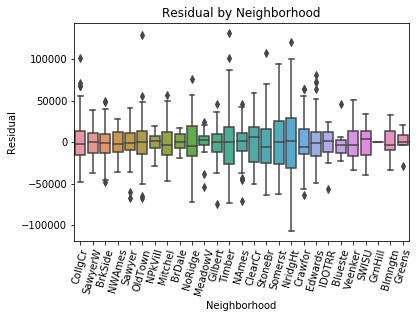

In [66]:
import seaborn as sns
ax = sns.boxplot(x="neighborhood", y="residual", data=n_file)
ax.set_title("Residual by Neighborhood")
ax.set_ylabel("Residual")
ax.set_xlabel("Neighborhood")
plt.xticks(rotation=75)
plt.show()

In [63]:
grouping = c_2[['neighborhood','actual_ppsf','predicted_ppsf','Neighborhood_Group']].groupby('neighborhood').mean()
grouping_sorted = grouping.sort_values(by=['actual_ppsf'], ascending=[False])
grouping_sorted
#neighborhoods sorted by actual ppsf

,actual_ppsf,predicted_ppsf
neighborhood,,
GrnHill,123.318386,123.318386
Blmngtn,118.892612,117.839159
NridgHt,116.384053,119.373685
Somerst,110.542232,111.702139
StoneBr,103.866523,105.737218
Timber,103.230292,103.698200
Gilbert,101.491760,100.569597
CollgCr,99.736694,99.986461
NoRidge,97.265357,97.242276


In [64]:
grouping_sorted_1 = grouping_sorted.reset_index()

In [65]:
grouping_sorted_1.iloc[1:]

,neighborhood,actual_ppsf,predicted_ppsf
1,Blmngtn,118.892612,117.839159
2,NridgHt,116.384053,119.373685
3,Somerst,110.542232,111.702139
4,StoneBr,103.866523,105.737218
5,Timber,103.230292,103.698200
6,Gilbert,101.491760,100.569597
7,CollgCr,99.736694,99.986461
8,NoRidge,97.265357,97.242276
9,Crawfor,96.726724,96.512449
10,Blueste,95.722814,95.435617


In [66]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
conditions = [
    (grouping_sorted_1['neighborhood'].isin(group1)),
    (grouping_sorted_1['neighborhood'].isin(group2)),
    (grouping_sorted_1['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
grouping_sorted_1['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
print(grouping_sorted_1)

   neighborhood  actual_ppsf  predicted_ppsf Neighborhood_Group
0       GrnHill   123.318386      123.318386                  1
1       Blmngtn   118.892612      117.839159                  1
2       NridgHt   116.384053      119.373685                  1
3       Somerst   110.542232      111.702139                  1
4       StoneBr   103.866523      105.737218                  1
5        Timber   103.230292      103.698200                  1
6       Gilbert   101.491760      100.569597                  1
7       CollgCr    99.736694       99.986461                  1
8       NoRidge    97.265357       97.242276                  1
9       Crawfor    96.726724       96.512449                  2
10      Blueste    95.722814       95.435617                  2
11      SawyerW    92.704506       92.312512                  2
12       Greens    91.696116       91.476015                  2
13      BrkSide    89.799890       90.008079                  2
14      Veenker    88.186158       88.50

In [67]:
# import packages for this example
import pandas as pd    
from collections import OrderedDict  # to create DataFrame with ordered columns
# special plotting methods
from pandas.tools.plotting import scatter_matrix    
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics  # for silhouette coefficient

In [73]:
#  Read in the data.
#used the student terms to make the transition smoother when appyling data from the Ames project. 
student_data = pd.read_csv('AMES_TRAIN_2.csv')

In [74]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(student_data))

# show number of observations in the DataFrame
print('Number of observations: ', len(student_data))

# show variable names
variable = student_data.columns
print('Variable names: ', variable)

# show descriptive statistics
pd.set_option('display.max_columns', None)  # do not limit output
print(student_data.describe())

# show a portion of the beginning of the DataFrame
print(student_data.head())

print('')
print('----- K-means Cluster Analysis of Variables -----')
print('')


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>
Number of observations:  1598
Variable names:  Index(['SubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'YrSold', 'SalePrice', 'index'],
      dtype='object')
          SubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1598.000000  1598.000000    1598.000000   1598.00000  1598.000000   
mean     55.632040    69.228411    9781.319149      6.17209     5.580726   
std      41.472669    23.093500    7142.776243      1.42253     1.054283   
min      20.000000    21.000000    1484.000000      1.00000     1.000000   
25%      20.000000    59.000000    7302.750000      5.00000     5.000000   
50%      50.000000    68.000000    9316.000000      6.00000     5.000000   
75%      70.000000    80.000000   11235

In [75]:
#standardized_student_data_matrix = preprocessing.scale(student_data)
variable_cluster_data =  student_data.T 

In [76]:
kmeans = KMeans(n_clusters = 5, n_init = 25, random_state = 1)
kmeans.fit(variable_cluster_data)
cluster = kmeans.predict(variable_cluster_data)

In [77]:
variable_kmeans_solution = pd.DataFrame(OrderedDict([('cluster', cluster)]))


In [78]:
for cluster_id in sorted(variable_kmeans_solution.cluster.unique()):
    print()
    print(variable_kmeans_solution.loc[variable_kmeans_solution['cluster'] == \
        cluster_id])


    cluster
0         0
1         0
3         0
4         0
8         0
9         0
11        0
13        0
14        0

    cluster
16        1

   cluster
2        2

    cluster
6         3
7         3
10        3
17        3

    cluster
5         4
12        4
15        4


In [80]:
print('Silhouette coefficient for the five-cluster k-means solution: ', 
    metrics.silhouette_score(variable_cluster_data, cluster, 
        metric = 'euclidean'))

Silhouette coefficient for the five-cluster k-means solution:  0.5973107457757819


In [81]:
student_cluster_data =  student_data.T


In [82]:
for nclusters in range(2,21): # search between 2 and 20 clusters/segments
    kmeans = KMeans(n_clusters = nclusters, n_init = 25, random_state = 1)
    kmeans.fit(student_cluster_data)
    segment = kmeans.predict(student_cluster_data)  # cluster ids for variables
    print('nclusters: ', nclusters, ' silhouette coefficient: ', 
        metrics.silhouette_score(student_cluster_data, segment, 
            metric='euclidean'))

nclusters:  2  silhouette coefficient:  0.933685314450438
nclusters:  3  silhouette coefficient:  0.8087945320576412
nclusters:  4  silhouette coefficient:  0.6113686039400812
nclusters:  5  silhouette coefficient:  0.5973107457757819
nclusters:  6  silhouette coefficient:  0.6213557485410732
nclusters:  7  silhouette coefficient:  0.5857851636583766
nclusters:  8  silhouette coefficient:  0.5774261149657764
nclusters:  9  silhouette coefficient:  0.5691775713480884
nclusters:  10  silhouette coefficient:  0.5119824634376947
nclusters:  11  silhouette coefficient:  0.38407095884175046
nclusters:  12  silhouette coefficient:  0.362060959649456
nclusters:  13  silhouette coefficient:  0.3600826368225804
nclusters:  14  silhouette coefficient:  0.26609220376267567
nclusters:  15  silhouette coefficient:  0.20186091543855106
nclusters:  16  silhouette coefficient:  0.14141273689400477
nclusters:  17  silhouette coefficient:  0.07420578730861298


ValueError: Number of labels is 18. Valid values are 2 to n_samples - 1 (inclusive)

In [116]:
print('')
print('----- Solution for 4 Student Segments -----')
print('')
kmeans = KMeans(n_clusters = 4, n_init = 25, random_state = 1)
kmeans.fit(student_cluster_data)
segment = kmeans.predict(student_cluster_data)  # cluster index


----- Solution for 4 Student Segments -----



In [117]:
student_kmeans_solution = pd.DataFrame(OrderedDict(
    [('student', range(0,len(student_cluster_data))),
    ('segment', segment)]))

In [118]:
student_segmentation_data = student_kmeans_solution.join(student_data)


In [119]:
for segment_id in sorted(student_segmentation_data.segment.unique()):
    print()
    print('Attribute means for segment: ', segment_id)
    this_student_segment_data = student_segmentation_data[ \
        student_segmentation_data.segment == segment_id]
    attributes = this_student_segment_data.ix[:,'SubClass':'SalePrice'].mean()    
    print(attributes)


Attribute means for segment:  0
SubClass            77.142857
LotFrontage         71.714286
LotArea           8776.714286
OverallQual          6.142857
OverallCond          5.857143
YearBuilt         1960.428571
TotalBsmtSF       1030.428571
FirstFlrSF        1022.714286
SecondFlrSF        468.857143
LowQualFinSF         0.000000
GrLivArea         1491.571429
Fireplaces           0.857143
GarageYrBlt       1966.714286
GarageCars           2.142857
GarageArea         569.000000
YrSold            2007.571429
SalePrice       188857.142857
dtype: float64

Attribute means for segment:  1
SubClass           190.0
LotFrontage         75.0
LotArea          11625.0
OverallQual          5.0
OverallCond          4.0
YearBuilt         1965.0
TotalBsmtSF       1039.0
FirstFlrSF        1039.0
SecondFlrSF          0.0
LowQualFinSF         0.0
GrLivArea         1039.0
Fireplaces           0.0
GarageYrBlt       1965.0
GarageCars           2.0
GarageArea         504.0
YrSold            2010.0
SalePrice

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [120]:
centers = kmeans.cluster_centers_
centers=centers.T
# turn centers into a df so we can plot the results 
d1 = pd.DataFrame({'zero': centers[:,0]})
d2 = pd.DataFrame({'one': centers[:,1]})
d = d1.join(d2) #column zero and one will be the two groups

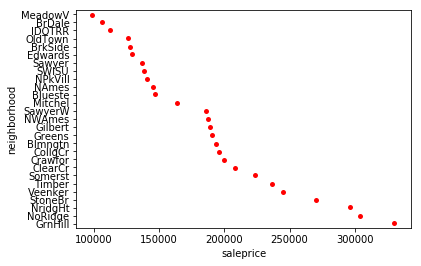

In [104]:
import seaborn as sns
data = pd.concat(
    [
        train.groupby('neighborhood').mean()['saleprice']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='saleprice').saleprice, data.sort_values(by='saleprice').index, orient='h', color='red');

In [106]:
neighbors_mean = data.sort_values(by='saleprice').saleprice

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=50).fit(neighbors_mean.values.reshape(-1, 1))

In [115]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 2, 2, 2], dtype=int32)

In [109]:
neighborhood_clusters = pd.concat(
    [
        neighbors_mean, 
        pd.Series(kmeans.labels_, index=neighbors_mean.index, name='Cluster')
    ],
    axis=1)

In [112]:
def neighborhood_to_cluster(neigh_string):
    return int(neighborhood_clusters[ neighborhood_clusters.index==neigh_string ]['Cluster'].values)
train['Neighborhood_cluster'] =  train['neighborhood'].apply(neighborhood_to_cluster)

In [ ]:
sns.boxplot(df['condition'], df['saleprice'])